In [291]:
# Import libraries

import numpy as np
import pandas as pd
import random
import zipfile
import io

from PIL import Image
from skimage.io import imread, imshow
from sklearn.model_selection import train_test_split
import tensorflow
import matplotlib.pyplot as plt

In [299]:
from tensorflow import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
import keras.utils as image

In [33]:
zip_ref = zipfile.ZipFile(r'''C:\Users\LENOVO\Downloads\dogs-vs-cats.zip''', 'r')
zip_ref.extractall(r'''C:\Users\LENOVO\Documents\GitHub\DS-17\Lab 09''')
zip_ref.close()

In [217]:
zip_file = zipfile.ZipFile(r'''C:\Users\LENOVO\Downloads\dogs-vs-cats\train.zip''', 'r')
filenames = zip_file.namelist()
count = len(filenames)

print(f'Number of images in our training file: {count}')

Number of images in our training file: 25001


In [218]:
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'train/dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [219]:
df = df.drop(df[df['filename'] == 'train/'].index)

In [220]:
df.head(3) # print first 3 lines from the DataFrame

,filename,category
1,train/cat.0.jpg,0
2,train/cat.1.jpg,0
3,train/cat.10.jpg,0


In [221]:
df.tail(3) # print last 3 lines from the DataFrame

,filename,category
24998,train/dog.9997.jpg,1
24999,train/dog.9998.jpg,1
25000,train/dog.9999.jpg,1


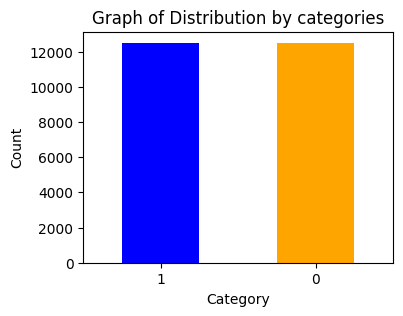

In [121]:
# Distribution by categories in the dataset
plt.figure(figsize=(4, 3))
colors = ['blue', 'orange']
df['category'].value_counts().plot.bar(color=colors)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Graph of Distribution by categories')
plt.xticks(rotation=0) 
plt.show()

So we have 12,000 images of cats (0) and 12,000 images of dogs (1) in our training data.

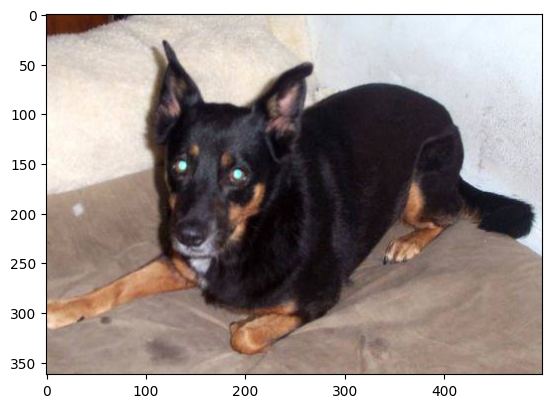

In [84]:
# Show a random file from the "train" directory

sample = random.choice(filenames) # select randomly the file
file_in_zip = zip_file.open(sample) # open the file

file_content = file_in_zip.read()

# file content is displayed as a sequence of bytes, so we convert this sequence of bytes into an image
file_object = io.BytesIO(file_content)

# Load and show the chosen image 
image = Image.open(file_object)
plt.imshow(image)
plt.show()

file_in_zip.close()

#### Prepare date 

In [47]:
zip_ref = zipfile.ZipFile(r'test1.zip', 'r')
zip_ref.extractall(r'''C:\Users\LENOVO\Documents\GitHub\DS-17\Lab 09''')
zip_ref.close()

In [85]:
from keras.preprocessing.image import ImageDataGenerator

In [222]:
df['category'] = df['category'].astype('str') # Convert the values in the category column to string

In [236]:
df = df.sample(frac=1).reset_index(drop=True) #mix data randomly

In [237]:
df.head()

,filename,category
0,train/dog.3306.jpg,1
1,train/dog.1516.jpg,1
2,train/cat.4232.jpg,0
3,train/dog.7110.jpg,1
4,train/cat.6311.jpg,0


In [249]:
# We divide the data into a test sample and a training sample
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [250]:
print(train.shape, test.shape)

(20000, 2) (5000, 2)


In [263]:
train_generator = ImageDataGenerator(
    rescale=1./255, # normalizathion
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_iterator = train_generator.flow_from_dataframe(train, x_col='filename', y_col='category',
                                                     target_size=(128, 128),
                                                     batch_size=128,
                                                     class_mode='binary')

Found 20000 validated image filenames belonging to 2 classes.


In [264]:
val_generator = ImageDataGenerator(rescale=1.255)
val_iterator = val_generator.flow_from_dataframe(test, x_col='filename', y_col='category',
                                                     target_size=(128, 128),
                                                     batch_size=128,
                                                     class_mode='binary')

Found 5000 validated image filenames belonging to 2 classes.


### Building the model

In [268]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [269]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 14, 14, 128)    

#### Training

In [270]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
157/157 [==============================] - 164s 1s/step - loss: 0.6655 - accuracy: 0.5996 - val_loss: 46.7395 - val_accuracy: 0.6790
Epoch 2/10
157/157 [==============================] - 158s 1s/step - loss: 0.5648 - accuracy: 0.7009 - val_loss: 95.2228 - val_accuracy: 0.6736
Epoch 3/10
157/157 [==============================] - 155s 984ms/step - loss: 0.5193 - accuracy: 0.7401 - val_loss: 61.1918 - val_accuracy: 0.7240
Epoch 4/10
157/157 [==============================] - 154s 979ms/step - loss: 0.4808 - accuracy: 0.7688 - val_loss: 63.7977 - val_accuracy: 0.7476
Epoch 5/10
157/157 [==============================] - 154s 981ms/step - loss: 0.4606 - accuracy: 0.7823 - val_loss: 91.5136 - val_accuracy: 0.7248
Epoch 6/10
157/157 [==============================] - 154s 978ms/step - loss: 0.4340 - accuracy: 0.7969 - val_loss: 48.8823 - val_accuracy: 0.7654
Epoch 7/10
157/157 [==============================] - 154s 981ms/step - loss: 0.4156 - accuracy: 0.8113 - val_loss: 42.9705 

### Visualizathion of Results

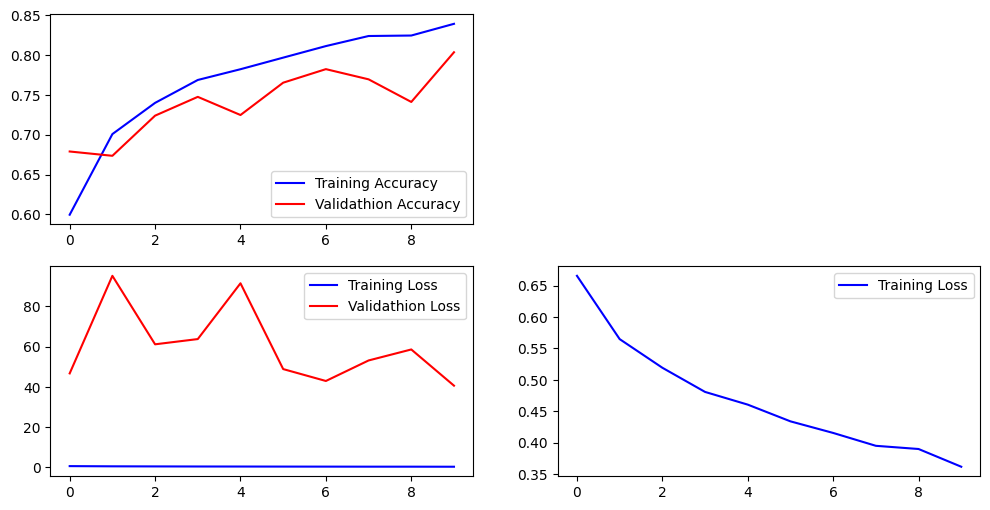

In [272]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

axes[0][0].plot(epochs, acc, 'b', label='Training Accuracy')
axes[0][0].plot(epochs, val_acc, 'r', label='Validathion Accuracy')
axes[0][0].legend()

axes[0][1].set_axis_off()
axes[0][1].remove()

loss = history.history['loss']
val_loss = history.history['val_loss']

axes[1][0].plot(epochs, loss, 'b', label='Training Loss')
axes[1][0].plot(epochs, val_loss, 'r', label='Validathion Loss')
axes[1][0].legend()

# In order to undestand corectly what hapenning with Training Loss, I add 3th graph
axes[1][1].plot(epochs, loss, 'b', label='Training Loss')
axes[1][1].legend()

plt.show()

- Highest training accuracy was 0.84
- Highest validathion accuracy was 0.80
- Lowest training loss was 0.36
- Lowest validathion loss was 40.6


In [273]:
print(max(acc),max(val_acc),
      min(loss), min(val_loss))

0.8392999768257141 0.803600013256073 0.36187613010406494 40.64324188232422


### Test with New Images

In [314]:
from keras.utils import load_img, img_to_array

1/1 [==============================] - 0s 19ms/step
Image: C:\Users\LENOVO\Documents\GitHub\DS-17\Lab 09\test1\11192.jpg
Label: Cat


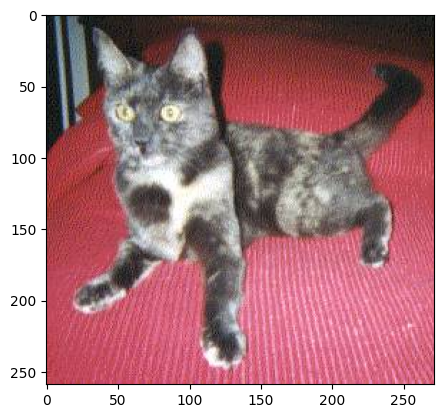

1/1 [==============================] - 0s 19ms/step
Image: C:\Users\LENOVO\Documents\GitHub\DS-17\Lab 09\test1\6547.jpg
Label: Cat


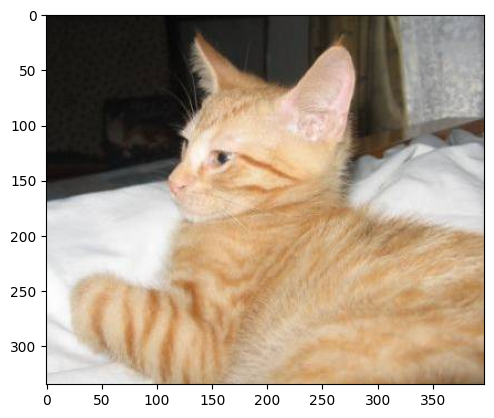

1/1 [==============================] - 0s 18ms/step
Image: C:\Users\LENOVO\Documents\GitHub\DS-17\Lab 09\test1\10086.jpg
Label: Dog


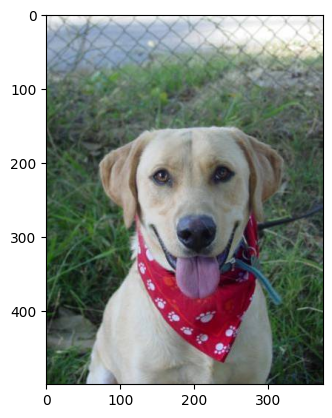

1/1 [==============================] - 0s 17ms/step
Image: C:\Users\LENOVO\Documents\GitHub\DS-17\Lab 09\test1\756.jpg
Label: Cat


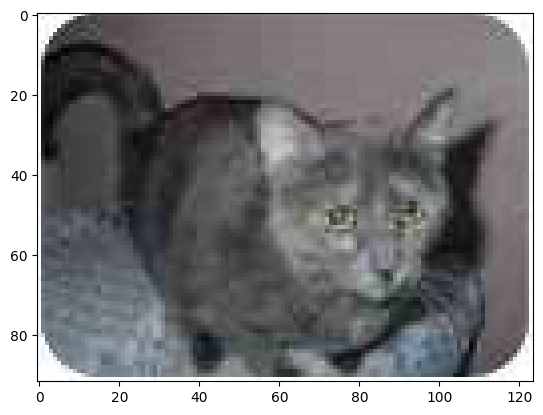

1/1 [==============================] - 0s 21ms/step
Image: C:\Users\LENOVO\Documents\GitHub\DS-17\Lab 09\test1\274.jpg
Label: Cat


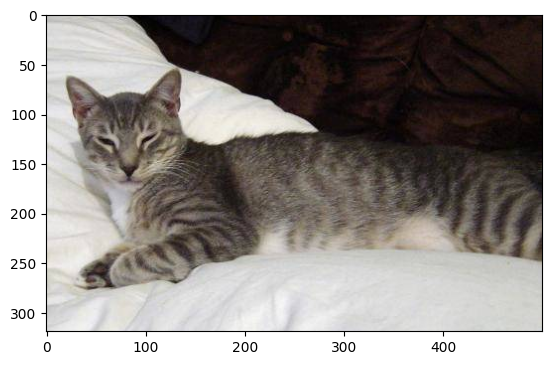

1/1 [==============================] - 0s 20ms/step
Image: C:\Users\LENOVO\Documents\GitHub\DS-17\Lab 09\test1\6433.jpg
Label: Dog


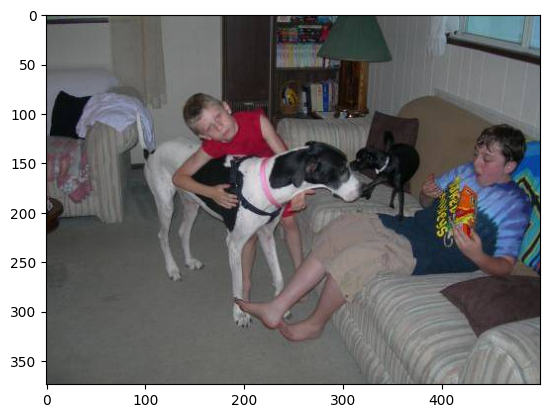

1/1 [==============================] - 0s 19ms/step
Image: C:\Users\LENOVO\Documents\GitHub\DS-17\Lab 09\test1\8162.jpg
Label: Dog


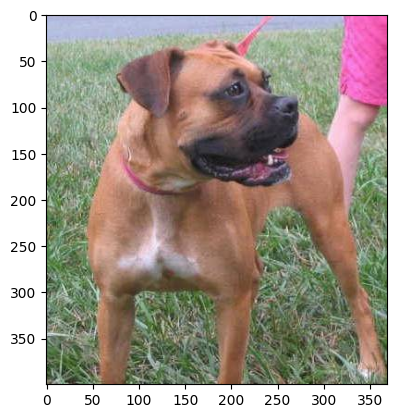

1/1 [==============================] - 0s 23ms/step
Image: C:\Users\LENOVO\Documents\GitHub\DS-17\Lab 09\test1\5069.jpg
Label: Dog


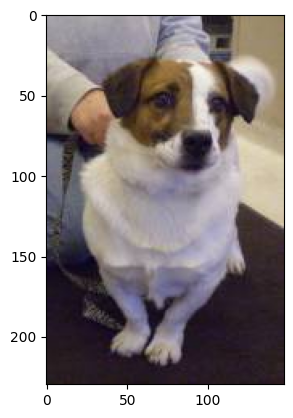

1/1 [==============================] - 0s 19ms/step
Image: C:\Users\LENOVO\Documents\GitHub\DS-17\Lab 09\test1\9.jpg
Label: Cat


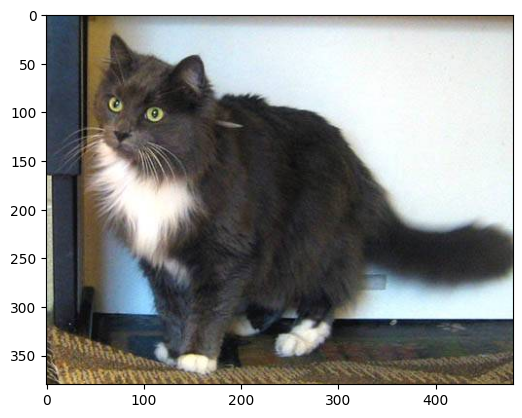

In [327]:
# Path to new images
image_path_template = r"C:\Users\LENOVO\Documents\GitHub\DS-17\Lab 09\test1\{}.jpg"

# Create function for prediction
def predict_label(image_path):
    img = load_img(image_path, target_size=(128, 128))
    img = np.array(img)
    img = img / 255.0  
    img = img.reshape(1, 128, 128, 3)  
    pred = model.predict(img)

    if pred[0] > 0.5:
        label = 'Dog'
    else:
        label = 'Cat'
    return label

# Let's choose randomly 10 pictures from folder test1
for i in range(1, 10):
    random_number = random.randint(1, 12501)
    random_image_path = image_path_template.format(random_number)

    # Prediction
    label = predict_label(random_image_path)
    
    # Review the result
    print('Path:', random_image_path)
    print('Category:', label)
    
    image = Image.open(random_image_path)
    plt.imshow(image)
    plt.show()